In [1]:
import neural_net_without_autograd as NNC

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

from sklearn.model_selection import  GridSearchCV, KFold, train_test_split 
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

In [2]:
def one_hot_encoder(input, labels):
    targets = np.zeros((len(input), labels))  
    for i, t in enumerate(input):
        targets[i, t] = 1
    
    return targets

In [3]:
np.random.seed(2024)

# Loading in the data
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=0)

### Epoch size

Accuracy as a function of the epoch size for a batch size 10, learning rate 0.001, 50 nodes in the hidden layer and activation functions sigmoid and softmax.

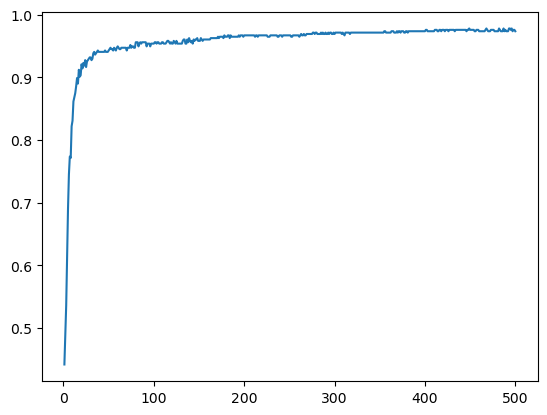

In [10]:
df = pd.read_csv('Results/epoch_size.csv')

plt.plot(np.linspace(1, 500, 500), df['Score'])
plt.show()

### Scores

In [16]:
# Define layer sizes and activations
network_input_size =  30
layer_output_sizes = [50, 2]
activations = ['relu', 'softmax']
#activations = [NNC.sigmoid, NNC.sigmoid]


pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', NNC.NeuralNet(network_input_size, layer_output_sizes, activations, epsilon=0.01, batch_size=10, epochs=500, llambda=0.01))
])

# getting data for confusion matrix
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict_proba(X_test)

# Evauluate the model
accuracy = pipeline.score(X_train, y_train)
print(f'Train accuracy: {accuracy:.4f}')

accuracy = pipeline.score(X_test, y_test)
print(f'Test accuracy: {accuracy:.4f}')

Epoch 0: Accuracy = 0.8857142857142857
Epoch 100: Accuracy = 0.9868131868131869
Epoch 200: Accuracy = 0.9868131868131869
Epoch 300: Accuracy = 0.9802197802197802
Epoch 400: Accuracy = 0.989010989010989
Train accuracy: 0.9890
Test accuracy: 0.9649


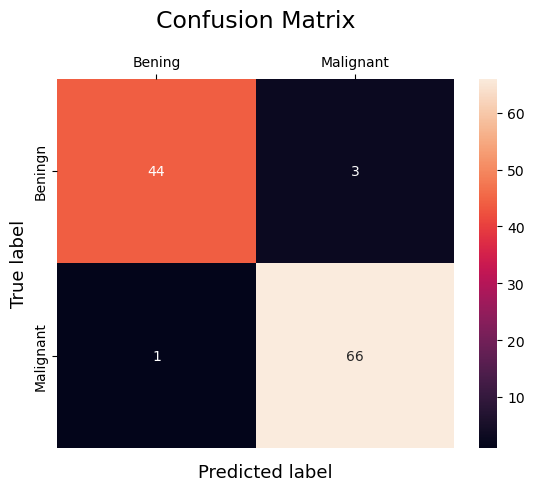

In [17]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, np.argmax(y_pred, -1))

# Plotting the confusion matrix
ax = sns.heatmap(cm, 
            annot=True,
            xticklabels=['Bening','Malignant'],
            yticklabels=['Beningn','Malignant'])
plt.ylabel('True label', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20, loc='center')
ax.set(xlabel="", ylabel="True label")
ax.xaxis.tick_top()

plt.gca().figure.text(0.45, 0.05, 'Predicted label', ha='center', fontsize=13)
plt.show()


### Gridsearch

One hidden layer

In [12]:
k_folds = KFold(n_splits=5)

pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', NNC.NeuralNet(network_input_size, layer_output_sizes, activations, batch_size=10, epochs=500))
])
param_grid = {
    'model__epsilon': np.logspace(-4, -1, 4),
    'model__llambda': [0, 0.0001, 0.001, 0.01, 0.1],
    'model__activations': [['sigmoid', 'softmax'], ['relu', 'softmax'], ['elu', 'softmax']],
    'model__n_hidden': [[25, 2], [50, 2], [100, 2]]
}

grid_search = GridSearchCV(estimator=pipeline,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=k_folds,
                  verbose=1,
                  n_jobs=1)
gs = grid_search.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Epoch 0: Accuracy = 0.6263736263736264
Epoch 100: Accuracy = 0.8928571428571429
Epoch 200: Accuracy = 0.9368131868131868
Epoch 300: Accuracy = 0.945054945054945
Epoch 400: Accuracy = 0.9587912087912088
Epoch 0: Accuracy = 0.36813186813186816
Epoch 100: Accuracy = 0.9093406593406593
Epoch 200: Accuracy = 0.9478021978021978
Epoch 300: Accuracy = 0.9587912087912088
Epoch 400: Accuracy = 0.9587912087912088
Epoch 0: Accuracy = 0.43956043956043955
Epoch 100: Accuracy = 0.9505494505494505
Epoch 200: Accuracy = 0.9752747252747253
Epoch 300: Accuracy = 0.9835164835164835
Epoch 400: Accuracy = 0.9835164835164835
Epoch 0: Accuracy = 0.7472527472527473
Epoch 100: Accuracy = 0.9148351648351648
Epoch 200: Accuracy = 0.9258241758241759
Epoch 300: Accuracy = 0.9368131868131868
Epoch 400: Accuracy = 0.9532967032967034
Epoch 0: Accuracy = 0.6456043956043956
Epoch 100: Accuracy = 0.9478021978021978
Epoch 200: Accuracy = 0.9560439560439561
Epo

c:\Users\maria\Documents\GitHub\Project2_FYS-STK3155\Code\Neural_Net\neural_net_without_autograd.py:80: RuntimeWarning: overflow encountered in divide
  return -target / predict
c:\Users\maria\Documents\GitHub\Project2_FYS-STK3155\Code\Neural_Net\neural_net_without_autograd.py:302: RuntimeWarning: invalid value encountered in multiply
  dC_dz = dC_da * activation_der(z)
c:\Users\maria\anaconda3\envs\fysstk3155\lib\site-packages\autograd\tracer.py:48: RuntimeWarning: invalid value encountered in matmul
  return f_raw(*args, **kwargs)


Epoch 0: Accuracy = 0.3543956043956044
Epoch 100: Accuracy = 0.3543956043956044
Epoch 200: Accuracy = 0.3543956043956044
Epoch 300: Accuracy = 0.3543956043956044
Epoch 400: Accuracy = 0.3543956043956044
Epoch 0: Accuracy = 0.9642857142857143
Epoch 100: Accuracy = 0.9945054945054945
Epoch 200: Accuracy = 1.0
Epoch 300: Accuracy = 1.0
Epoch 400: Accuracy = 1.0
Epoch 0: Accuracy = 0.9368131868131868
Epoch 100: Accuracy = 0.9835164835164835
Epoch 200: Accuracy = 0.989010989010989
Epoch 300: Accuracy = 0.9945054945054945
Epoch 400: Accuracy = 0.9945054945054945
Epoch 0: Accuracy = 0.9230769230769231
Epoch 100: Accuracy = 0.989010989010989
Epoch 200: Accuracy = 0.9945054945054945
Epoch 300: Accuracy = 0.9945054945054945
Epoch 400: Accuracy = 0.9972527472527473
Epoch 0: Accuracy = 0.9258241758241759
Epoch 100: Accuracy = 0.9862637362637363
Epoch 200: Accuracy = 0.9972527472527473
Epoch 300: Accuracy = 0.9972527472527473
Epoch 400: Accuracy = 1.0
Epoch 0: Accuracy = 0.8763736263736264
Epoch 10

c:\Users\maria\Documents\GitHub\Project2_FYS-STK3155\Code\Neural_Net\neural_net_without_autograd.py:80: RuntimeWarning: invalid value encountered in divide
  return -target / predict


Epoch 0: Accuracy = 0.3598901098901099
Epoch 100: Accuracy = 0.3598901098901099
Epoch 200: Accuracy = 0.3598901098901099
Epoch 300: Accuracy = 0.3598901098901099
Epoch 400: Accuracy = 0.3598901098901099
Epoch 0: Accuracy = 0.9615384615384616
Epoch 100: Accuracy = 0.9560439560439561
Epoch 200: Accuracy = 0.5137362637362637
Epoch 300: Accuracy = 0.9615384615384616
Epoch 400: Accuracy = 0.9285714285714286
Epoch 0: Accuracy = 0.9203296703296703
Epoch 100: Accuracy = 0.9285714285714286
Epoch 200: Accuracy = 0.9615384615384616
Epoch 300: Accuracy = 0.8736263736263736
Epoch 400: Accuracy = 0.9423076923076923
Epoch 0: Accuracy = 0.5686813186813187
Epoch 100: Accuracy = 0.9148351648351648
Epoch 200: Accuracy = 0.9478021978021978
Epoch 300: Accuracy = 0.9587912087912088
Epoch 400: Accuracy = 0.9642857142857143
Epoch 0: Accuracy = 0.3708791208791209
Epoch 100: Accuracy = 0.8653846153846154
Epoch 200: Accuracy = 0.9093406593406593
Epoch 300: Accuracy = 0.9258241758241759
Epoch 400: Accuracy = 0.94

In [15]:
cv_results = grid_search.cv_results_

# Convert to a pandas DataFrame for better readability
results_df = pd.DataFrame(cv_results)

# Display the parameter combinations and their corresponding mean test scores
print(results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']])

results_df.to_csv('Results/gridsearch_wisconsin.csv', sep=',', encoding='utf-8')

                                                params  mean_test_score  \
0    {'model__activations': ['sigmoid', 'softmax'],...         0.951648   
1    {'model__activations': ['sigmoid', 'softmax'],...         0.960440   
2    {'model__activations': ['sigmoid', 'softmax'],...         0.971429   
3    {'model__activations': ['sigmoid', 'softmax'],...         0.971429   
4    {'model__activations': ['sigmoid', 'softmax'],...         0.964835   
..                                                 ...              ...   
175  {'model__activations': ['elu', 'softmax'], 'mo...         0.964835   
176  {'model__activations': ['elu', 'softmax'], 'mo...         0.964835   
177  {'model__activations': ['elu', 'softmax'], 'mo...         0.962637   
178  {'model__activations': ['elu', 'softmax'], 'mo...         0.938462   
179  {'model__activations': ['elu', 'softmax'], 'mo...         0.894505   

     std_test_score  rank_test_score  
0          0.017855              158  
1          0.030769  

Two layers

In [22]:
k_folds = KFold(n_splits=5)
layer_output_sizes = [8, 8, 3]
activations = ['sigmoid', 'sigmoid', 'softmax']

pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', NNC.NeuralNet(network_input_size, layer_output_sizes, activations, batch_size=10, epochs=500))
])

param_grid = {
    'model__epsilon': np.logspace(-4, -1, 4),
    'model__llambda': [0, 0.0001, 0.001, 0.01, 0.1],
    'model__activations': [['sigmoid', 'sigmoid', 'softmax'], ['relu', 'relu', 'softmax'], ['elu', 'elu', 'softmax']],
    'model__n_hidden': [[25, 25, 2], [50, 50, 2], [100, 100, 2]]
}

grid_search = GridSearchCV(estimator=pipeline,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=k_folds,
                  verbose=3,
                  n_jobs=1)
gs = grid_search.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5] END model__activations=['sigmoid', 'sigmoid', 'softmax'], model__epsilon=0.0001, model__llambda=0, model__n_hidden=[25, 25, 2];, score=nan total time=   0.0s
[CV 2/5] END model__activations=['sigmoid', 'sigmoid', 'softmax'], model__epsilon=0.0001, model__llambda=0, model__n_hidden=[25, 25, 2];, score=nan total time=   0.0s
[CV 3/5] END model__activations=['sigmoid', 'sigmoid', 'softmax'], model__epsilon=0.0001, model__llambda=0, model__n_hidden=[25, 25, 2];, score=nan total time=   0.0s
[CV 4/5] END model__activations=['sigmoid', 'sigmoid', 'softmax'], model__epsilon=0.0001, model__llambda=0, model__n_hidden=[25, 25, 2];, score=nan total time=   0.0s
[CV 5/5] END model__activations=['sigmoid', 'sigmoid', 'softmax'], model__epsilon=0.0001, model__llambda=0, model__n_hidden=[25, 25, 2];, score=nan total time=   0.0s
[CV 1/5] END model__activations=['sigmoid', 'sigmoid', 'softmax'], model__epsilon=0.0001, model__llamb

ValueError: 
All the 900 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
900 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\maria\anaconda3\envs\fysstk3155\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\maria\anaconda3\envs\fysstk3155\lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\maria\anaconda3\envs\fysstk3155\lib\site-packages\sklearn\pipeline.py", line 473, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "c:\Users\maria\Documents\GitHub\Project2_FYS-STK3155\Code\Neural_Net\neural_net_without_autograd.py", line 346, in fit
    self.gradient_descent(Xi, yi)
  File "c:\Users\maria\Documents\GitHub\Project2_FYS-STK3155\Code\Neural_Net\neural_net_without_autograd.py", line 371, in gradient_descent
    layers_grad = self.backpropagation(X, y)
  File "c:\Users\maria\Documents\GitHub\Project2_FYS-STK3155\Code\Neural_Net\neural_net_without_autograd.py", line 288, in backpropagation
    layer_input, z, activation_der = layer_inputs[i], zs[i], self.activation_ders[i]
IndexError: list index out of range
